In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [2]:
data=pd.read_csv('C:/Users/Tony/Desktop/orginal_year.csv',header=None )

In [3]:
straining_data_len=int(np.ceil( len(data[1]) * .95 )) #get the 95% of rows
training_data_len

260

In [4]:
AT=np.array(data[1])
temp_values=AT.reshape(AT.shape[0],1)

In [5]:
from sklearn.preprocessing import MinMaxScaler #preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(temp_values)

# scaled_data

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.23619289, 0.21319616, 0.34543435, 0.28877498, 0.41181745,
       0.3592172 , 0.42459542, 0.44349013, 0.00234142, 0.19686068,
       0.        , 0.33373386, 0.32162745, 0.10111662, 0.37631501,
       0.43156523, 0.43348919, 0.40423053, 0.09717795, 0.31008371])]
[0.3120076668079026]

[array([0.23619289, 0.21319616, 0.34543435, 0.28877498, 0.41181745,
       0.3592172 , 0.42459542, 0.44349013, 0.00234142, 0.19686068,
       0.        , 0.33373386, 0.32162745, 0.10111662, 0.37631501,
       0.43156523, 0.43348919, 0.40423053, 0.09717795, 0.31008371]), array([0.21319616, 0.34543435, 0.28877498, 0.41181745, 0.3592172 ,
       0.42459542, 0.44349013, 0.00234142, 0.19686068, 0.        ,
       0.33373386, 0.32162745, 0.10111662, 0.37631501, 0.43156523,
       0.43348919, 0.40423053, 0.09717795, 0.31008371, 0.31200767])]
[0.3120076668079026, 0.3007180349724998]



In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=15, epochs=40)

Epoch 1/40
16/16 [==============================] - 3s 5ms/step - loss: 0.0323
Epoch 2/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 3/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 4/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 5/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 6/40
16/16 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 7/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 8/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 9/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 10/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 11/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 12/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 13/40
16/16 [==============================

In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 20: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = temp_values[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 0s 17ms/step


0.2985776256469614

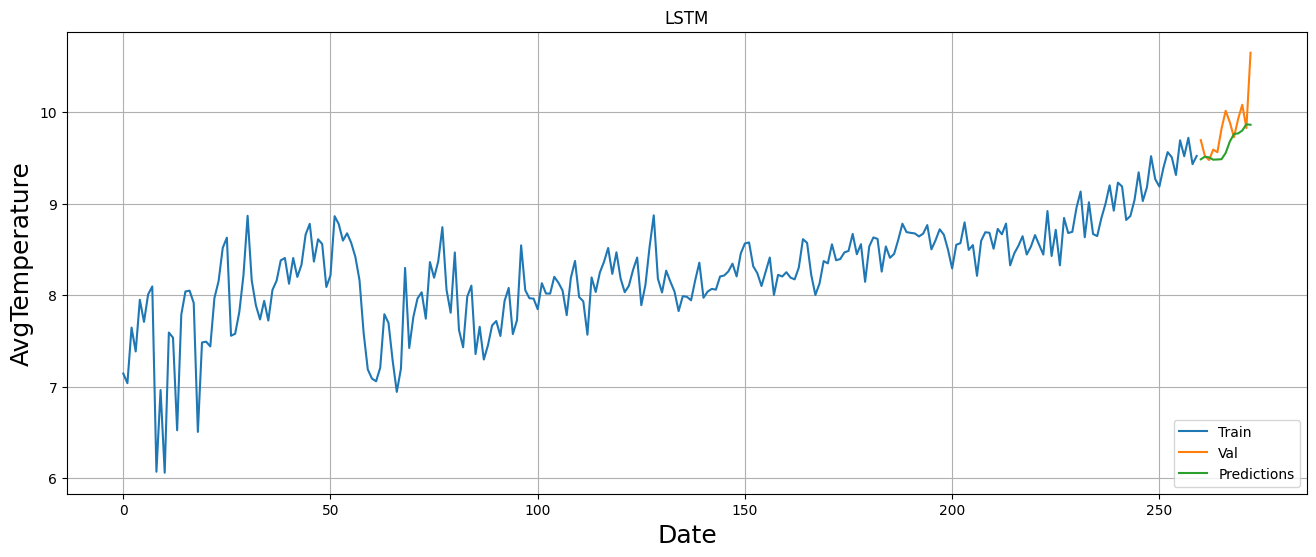

In [9]:
temperature=data[1]
train = temperature[:training_data_len]
valid=pd.DataFrame(columns=['AvgTemperature', 'Predictions'])
valid['AvgTemperature'] = temperature[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('AvgTemperature', fontsize=18)
plt.plot(train)
plt.plot(valid[['AvgTemperature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.grid(True)
# plt.show()
# plt.savefig('plot1_2_2.png', dpi=300) #指定分辨率保存